##**Nama Naggota :**
*   Salma Safira Ramadhanti (24060119140109)
*   Merry Tantri Millenia Tobing (24060119120013)
*   Denisa Putri (24060119130047)


###**Pembelajaran Mesin - A**



#**Algoritma Klasifikasi pada Heart Dataset**

Akan diimplementasikan empat algoritma klasifikasi, yaitu :

1.   K Nearest Neighbours Classifier
2.   Logistic Regression Classifier
3.   Decision Trees Classifier
4.   Support Vector Machine Classifier

##**Import Library yang dibutuhkan**

In [ ]:
#Library yang di import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import model_selection


##**Masukan Dataset**

In [ ]:
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vRvCjxIvd0GRq0vXDUQNH5jDtgNn6WQX5_Fcfy5ckD-mA58D2gTKwz7HFzVHLiSo_XdQq8bJYONQwaP/pub?gid=1069840284&single=true&output=csv"
dataset = pd.read_csv(url)

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#info dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Banyaknya baris dan fitur pada dataset
dataset.shape

(303, 14)

In [ ]:
#Distribusi kelas data
print(dataset.groupby('target').size())

target
0    138
1    165
dtype: int64


##**Data Preprocessing**

In [ ]:
#Cek duplikasi baris pada data
duplicate_rows = dataset[dataset.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


In [ ]:
#Terdapat satu baris yang duplikat
#Menghapus baris yang duplikat
dataset = dataset.drop_duplicates()
duplicate_rows = dataset[dataset.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
#Banyaknya baris yang duplikat setelah menghapus satu baris yang duplikat

Number of duplicate rows ::  (0, 14)


In [ ]:
#Melihat nilai null pada data
print("Null values :: ")
print(dataset.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
#Check if the other data is consistent
dataset.shape

(302, 14)

##**Visualisasi Data Menggunakan Plot Univariat**

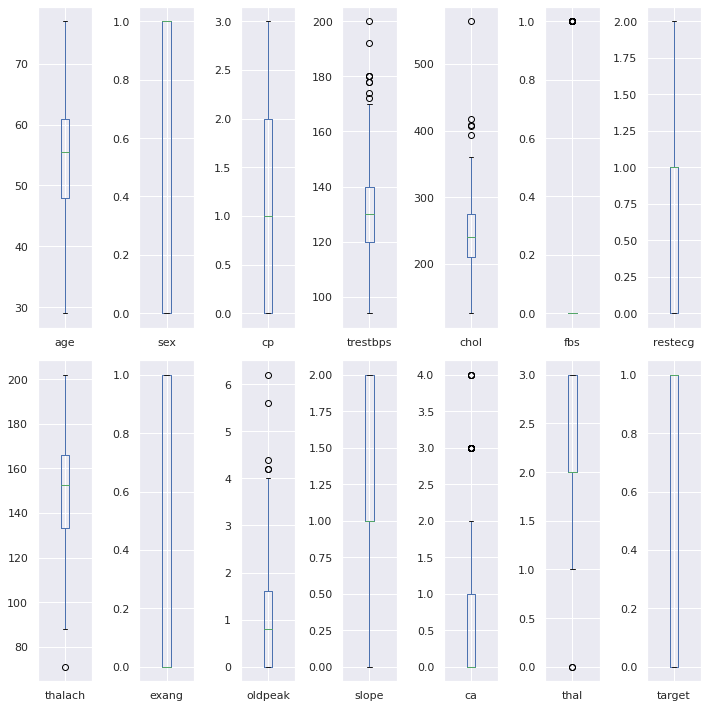

In [ ]:
import matplotlib.pyplot as plt

#Membuat boxplot dari dataset
dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False, figsize=(10, 10))

#Mengatur padding layout antara subplot
plt.tight_layout()

#Menampilkan plot yang dibuat
plt.show()

Dapat terlihat bahwa terdapat outlier data pada kolom trestbps, chol, thalach, oldpeak, ca, thal. Oleh karena itu, outlier harus dihapus. Salah satu metode untuk menghapus outlier adalah menggunakan metode Z-score. Pada Z-score kita definisikan, jika Z-score bernilai lebih dari 3, itu menyiratkan bahwa titik data berbeda dari titik data lainnya dan karenanya diperlakukan sebagai outlier.

In [ ]:
#Hapus outlier menggunakan Z-score
z = np.abs(stats.zscore(dataset))
dataset2 = dataset[(z<3).all(axis=1)]
dataset2.shape

(287, 14)

##**Korelasi**

Setelah menghapus outlier dari data, langkah selanjutnya adalah menemukan korelasi antara semua fitur. Terdapat dua tipe korelasi yang akan digunakan, yaitu Pearson Correlation.



**Pearson Correlation**


Text(0.5, 1.0, 'Pearson Correlation')

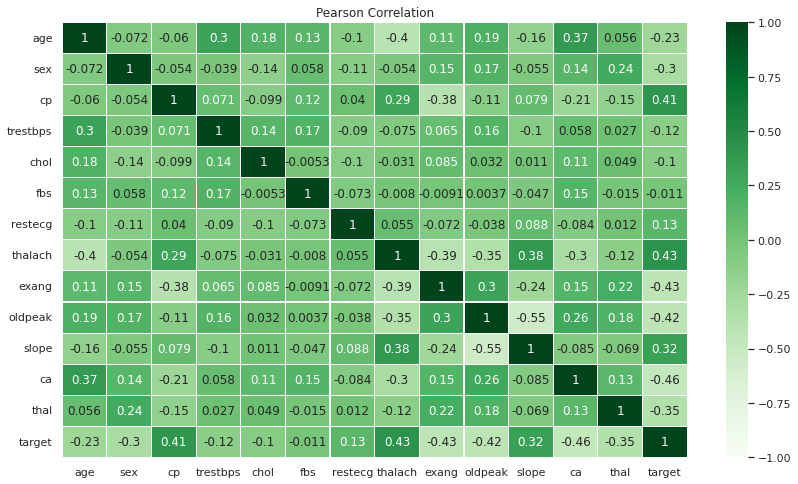

In [ ]:
#Mencari korelasi antara variabel
pearsonCorr = dataset2.corr(method='pearson')
spearmanCorr = dataset2.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Dari heat map, nilai korelasi yang sama diulang dua kali. Untuk menghapusnya, tutupi bagian atas heat map dan hanya menampilkan bagian bawah. Prosedur yang sama akan dilakukan untuk Korelasi Spearman.

Text(0.5, 1.0, 'Pearson Correlation')

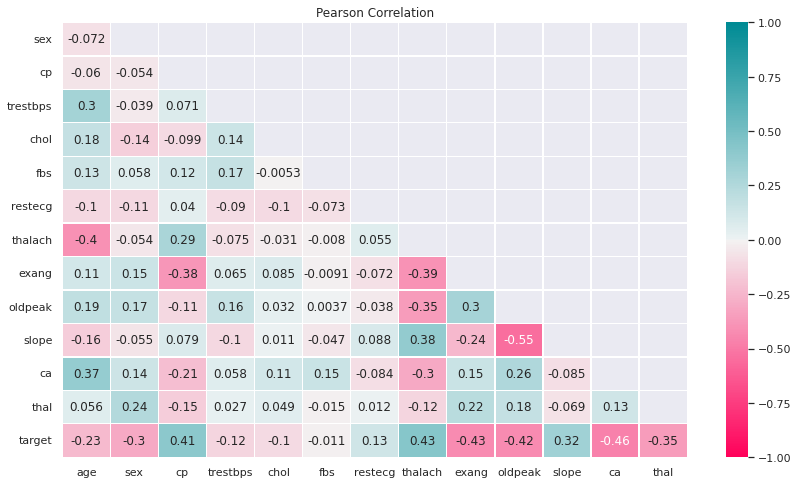

In [ ]:
#Create mask for both correlation matrices
#Pearson corr masking
#Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

Dari kedua heat map, fitur fbs, chol, dan tresrbps mempunyai korelasi yang paling rendah dengan output. 

##**Menerapkan Algoritma Klasifikasi**

### **I. Membagi Dataset menjadi 2 subset data**

Sebelum mengimplementasikan beberapa algoritma klasifikasi, data akan dibagi menjadi 2 subset data, yaitu data training dan data testing. Pembagian yang digunkan adalah 70% untuk data training dan 30% untuk data testing.

In [ ]:
#Dari pearson correlation dapat dilihat miminum korelasi antara output dan fitur lainnya berada di fbs, tresrbps, dan chol
x = dataset2.drop("target", axis=1)
y = dataset2["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=5)

### **II. K-Fold Cross Validation**

Validasi yang digunakan adalah K-Folds Cross Validation. Dimana digunakan validasi silang 10 kali lipat untuk memperkirakan akurasi. Dataset akan dibagi menjadi 10 bagian, 9 untuk latihan (training) dan 1 untuk melakukan pengujian, lalu ulangi untuk semua kombinasi yang ada. Berikut visualisasi atau gambaran penggunaan K-Fold Cross Validation.

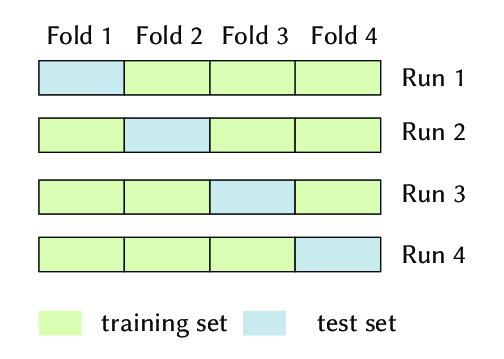

In [ ]:
# Test options and evaluation metric (untuk membangun model)
#Menagtur pengambilan data
seed = 5
#Mengatur scoring yang digunakan pada evaluasi algoritma
scoring = 'accuracy'

### **III. Membangun Model**


Untuk mengetahui algoritma yang cocok dengan studi kasus Heart dataset, dilakukan evaluasi dengan beberapa algoritma. Model klasifikasi yang akan digunakan yaitu K-Nearest Neighbors (KNN), Logistic Regression (LR), Decision Tree (DT), dan Support Vector Machines (SVM).

In [ ]:
#Spot Check Algorithm
models = []
#Membangun model Algoritma klasifikasi K-Nearest Neighbors
models.append(('knc', KNeighborsClassifier()))

#Membangun model Algoritma klasifikasi Logistic Regression
models.append(('logReg',LogisticRegression(solver='liblinear')))

#Membangun model Algoritma klasifikasi Decision Tree
#Pada decision tree, diatur maksimum kedalamannya 6
models.append(('decTree', DecisionTreeClassifier(max_depth=6)))

#Membangun model Algoritma klasifikasi Support Vector Machines
models.append(('svm', SVC()))


In [ ]:
#Mengevaluasi setiap model
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

knc: 0.620000 (0.067823)
logReg: 0.830000 (0.045826)
decTree: 0.760000 (0.076811)
svm: 0.615000 (0.077621)


### **IV. Mengevaluasi Kinerja Setiap Algoritma dan Memilih yang Terbaik**

Dari hasil evaluasi keempat model diatas, untuk memilih model yang terbaik dilakukan perbandingan satu sama lainnya dan dipilih yang paling akurat. 

Dari hasil evaluasi sebelumnya, didapatkan akurasi dari setiap model sebagai berikut:

1.   knc: 0.620000 (0.067823)
2.   logReg: 0.830000 (0.045826)
3.   decTree: 0.760000 (0.076811)
4.   svm: 0.615000 (0.077621)

Dari hasil output, dapat diketahui bahwa Logistic Regression memiliki nilai akurasi perkiraan terbesar, maka dapat dikatakan bahwa model yang paling akurat adalah Logistic Regression. 

Namun, untuk mengevaluasi setiap model agar lebih terperinci, dilakukan pencocokan model dengan data, lalu dihitung akurasi, confusion matrix, dan classification report. Berikut evaluasi setiap model.

#### **1. K Nearest Neighbours Classifier**

In [ ]:
#K Neighbours Classifier
knc.fit(x_train,y_train)
y_pred_knc = knc.predict(x_test)
print("Accuracy of K-Neighbours classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))

Accuracy of K-Neighbours classifier ::  0.6436781609195402


In [ ]:
#Menghitung Confusion Matrix
print(confusion_matrix(y_test, y_pred_knc))

[[25 19]
 [12 31]]


In [ ]:
#Klasifikasi report
print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62        44
           1       0.62      0.72      0.67        43

    accuracy                           0.64        87
   macro avg       0.65      0.64      0.64        87
weighted avg       0.65      0.64      0.64        87



#### **2. Logistic Regression Classifier**

In [ ]:
#   ****************Logistic Regression*****************
logReg.fit(x_train, y_train)
#Cek accuracy pada Logistic Regression
y_pred_logReg = logReg.predict(x_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))

Accuracy of logistic regression classifier ::  0.896551724137931


In [ ]:
#Menghitung Confusion Matrix
print(confusion_matrix(y_test, y_pred_logReg))

[[38  6]
 [ 3 40]]


In [ ]:
#Klasifikasi report
print(classification_report(y_test, y_pred_logReg))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        44
           1       0.87      0.93      0.90        43

    accuracy                           0.90        87
   macro avg       0.90      0.90      0.90        87
weighted avg       0.90      0.90      0.90        87



#### **3. Decision Tree Classifier**

In [ ]:
# ***********************Decision Tree Classification***********************
decTree.fit(x_train,y_train)
y_pred_decTree = decTree.predict(x_test)
print("Accuracy of Decision Trees :: " , metrics.accuracy_score(y_test,y_pred_decTree))

Accuracy of Decision Trees ::  0.7816091954022989


In [ ]:
#Menghitung Confusion Matrix
print(confusion_matrix(y_test, y_pred_decTree))

[[36  8]
 [11 32]]


In [ ]:
#Klasifikasi report
print(classification_report(y_test, y_pred_decTree))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        44
           1       0.80      0.74      0.77        43

    accuracy                           0.78        87
   macro avg       0.78      0.78      0.78        87
weighted avg       0.78      0.78      0.78        87



#### **4. Support Vector Machine**

In [ ]:
# ***********************Support Vector Machine Classification***********************
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print("Accuracy of Support Vector Machine :: " , metrics.accuracy_score(y_test,y_pred_svm))

Accuracy of Support Vector Machine ::  0.8620689655172413


In [ ]:
#Menghitung Confusion Matrix
print(confusion_matrix(y_test, y_pred_svm))

[[37  7]
 [ 5 38]]


In [ ]:
#Klasifikasi report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        44
           1       0.84      0.88      0.86        43

    accuracy                           0.86        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.86      0.86      0.86        87



##**Kesimpulan**

In [ ]:
#Models dan accuracy setiap model 
print("*****************Models and accuracy setiap model*****************")
print("K Neighbours Classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))
print("Logistic Regression Classifier :: ", metrics.accuracy_score(y_test,y_pred_logReg))
print("Decision Tree :: ", metrics.accuracy_score(y_test,y_pred_decTree))
print("Support Vector Machine :: ", metrics.accuracy_score(y_test,y_pred_svm))

*****************Models and accuracy setiap model*****************
K Neighbours Classifier ::  0.6436781609195402
Logistic Regression Classifier ::  0.896551724137931
Decision Tree ::  0.7816091954022989
Support Vector Machine ::  0.8620689655172413


Setelah mengimplementasikan empat model klasifikasi dan membandingkan nilai akurasi, confusion matrix, dan classification report diantara keempatnya, maka dapat kita simpulkan bahwa untuk Heart dataset model yang tepat untuk digunakan adalah Logistic Regression Classifier.